In [2]:

import numpy as np
import pandas as pd
import datetime

from ThermalModel import ThermalModel


ModuleNotFoundError: No module named 'utils3'

In [ ]:
def TM_test(thermal_model, training_data, test_data):
    """Testing for a trained thermal model. Gets training, test, and some forecasting error."""
    
    predictive_interval = datetime.timedelta(minutes=thermal_model.interval_thermal)
    
    training_error = thermal_model.score(training_data, training_data["t_next"])
    test_error = thermal_model.score(test_data, test_data["t_next"])
    
    start_forecasting = datetime.datetime(year=2018, month=4, day=4, hour=0)
    # start = datetime.datetime(year=2018, month=3, day=26, hour=0)

    zero_row = test_data.loc[start]
    first_row = test_data.start[start + predictive_interval]
    curr_time = start

    tm_predictions = [zero_row["t_in"], first_row["t_in"]]

    print(new_pred_horizon.loc[curr_time])

    while True:
        try:
            curr_row = test_data.loc[curr_time].to_frame().T

            curr_row["t_in"] = tm_predictions[-1]
            curr_row["t_last"] = tm_predictions[-2]
            tm_predictions.append(thermal_model.predict(curr_row)[0])

            curr_time += datetime.timedelta(minutes=test_data.loc[curr_time]["dt"])

        except:
            break
    
    
    

Training data
('First Order Model', (0.1438397078914591, 3.524322777573232e-06, 0.1438397078482831))
('Second Order Model', (0.13667471000286188, -4.6232200317030327e-07, 0.13667471000207998))
('LTI model', (0.12870449863479394, -2.8890125480233984e-06, 0.12870449860236932))
('Random Forest', (0.0967468416482131, -2.8154374213008913e-05, 0.09674683755159977))
Test data
('First Order Model', (0.15437796223171232, -0.003986150357024252, 0.1543264910122277))
('Second Order Model', (0.2305928707327783, 0.005440019480108081, 0.23052869283635788))
('LTI model', (0.14759823679002304, -0.005782019731295761, 0.14748494076125404))
('Random Forest', (0.3361994249544109, 0.05042126504777609, 0.3323969755738739))
2018-04-04 00:00:00
action                                         0.000000
action_duration                               90.000000
dt                                             5.000000
previous_action                                1.000000
t_next                                        

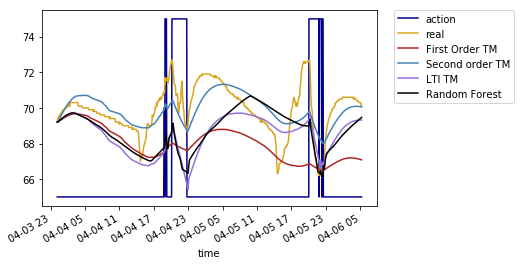

In [10]:


import matplotlib.pyplot as plt
date_range = new_pred_horizon.loc[first_row.name:curr_time].index

first_tm_plot = pd.Series(index=date_range, data=first_tm_pred[:len(date_range)])
second_tm_plot = pd.Series(index=date_range, data=second_tm_pred[:len(date_range)])
lti_tm_plot = pd.Series(index=date_range, data=lti_tm_pred[:len(date_range)])
random_forest_plot = pd.Series(index=date_range, data=random_forest_pred[:len(date_range)])


occ_plot = pd.Series(index=date_range, data=test_data["occ"][date_range])

real_plot = new_pred_horizon.loc[date_range]["t_in"]
real_outside_plot = new_pred_horizon.loc[date_range]["t_out"]

real_action_plt = new_pred_horizon.loc[date_range]["action"]

real_action_plt *= 5
real_action_plt += 65
real_action_plt.plot(label="action", color="darkblue")

# real_outside_plot.plot(label="t_out")

real_plot.plot(label="real", color="goldenrod")


first_tm_plot.plot(label="First Order TM", color="firebrick")
# plt.show()

second_tm_plot.plot(label="Second order TM", color="steelblue")

lti_tm_plot.plot(label="LTI TM", color="mediumpurple")
# plt.show()


random_forest_plot.plot(label="Random Forest",  color="black")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


# print("plot")
# print(occ_plot)

# occ_plot.plot()
# plt.show()

def get_rmse_plot(pred, real):
    pred = pred[:len(real)]
    real = real[:len(pred)]
    diff = pred - real
    diff = np.square(diff)
    return np.sqrt(diff.mean())

# print("lag", get_rmse_plot(tm_pred_plot, real_plot))
# print("old", get_rmse_plot(old_pred_plot, real_plot))
# print("occ lag", get_rmse_plot(lag_tm_plot, real_plot))
# print("sec order", get_rmse_plot(second_tm_pred, real_plot))
# print("sec order occ", get_rmse_plot(second_occ_tm_pred, real_plot))

